In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def s(tau,omega,xi,ufun):
    return ufun(tau) * np.exp(xi*omega*tau) * np.sin(omega*tau*np.sqrt(1-xi**2))
def c(tau,omega,xi,ufun):
    return ufun(tau) * np.exp(xi*omega*tau) * np.cos(omega*tau*np.sqrt(1-xi**2))

def A_conti(t,omega,xi,ufun):
    S = scipy.integrate.quad(s, 0, t, args=(omega,xi,ufun),limit=500)[0]
    C = scipy.integrate.quad(c, 0, t, args=(omega,xi,ufun),limit=500)[0]
    PRV = np.exp(-xi*omega*t) * np.sqrt(S**2 + C**2)
    return PRV


In [36]:
def plotfun(ufun):
    Fs = np.linspace(0.,4.,401)
    omegas = 2*np.pi*Fs
    xis = np.arange(0.0,0.05,0.01)
    As = np.array([[A_conti(1,omega,xi,ufun) for xi in xis] for omega in omegas])
    taus = np.linspace(-0.1,1.1,221)
    us = [ufun(tau) for tau in taus]
    #
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    ax[0].plot(taus,us)
    ax[0].set_xlabel('τ')
    ax[0].set_ylabel('Smoothing function')
    nXis = len(xis)
    colors = plt.cm.viridis(np.linspace(0,0.95,nXis))
    for xi_idx in range(0,nXis):
        ax[1].plot(Fs,As[:,xi_idx],color=colors[xi_idx])
    ax[1].set_xlabel('Frequency ratio')
    ax[1].set_ylabel('Percent Residual Vibration')
    #ax[1].set_xlim(1.4,1.45)
    #ax[1].set_ylim(0,0.1)

In [4]:
def limitTo01(ufun):
    def ulim(tau):
        if tau<0.0 or tau>1.0:
            return 0.0
        return ufun(tau)
    return ulim

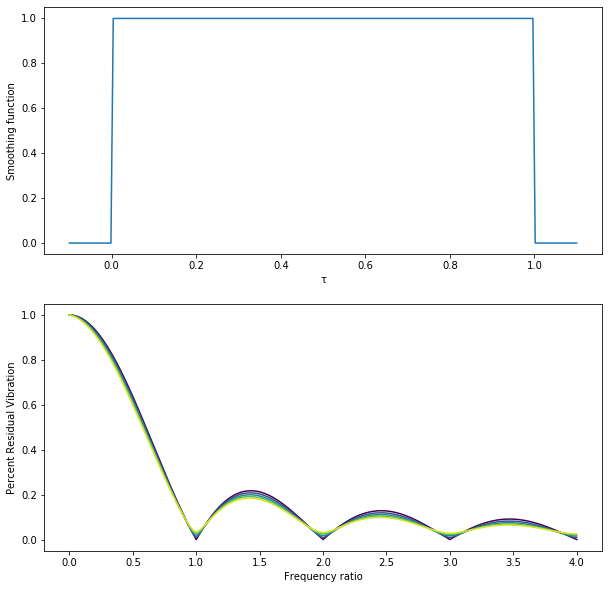

In [5]:
def u(tau):
    return 1.0

plotfun(limitTo01(u))

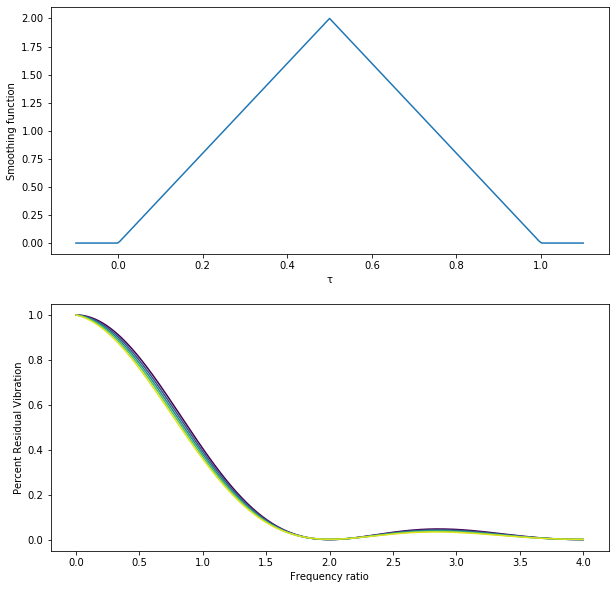

In [6]:
def u(tau):
    return 4*min(tau,1-tau)

plotfun(limitTo01(u))

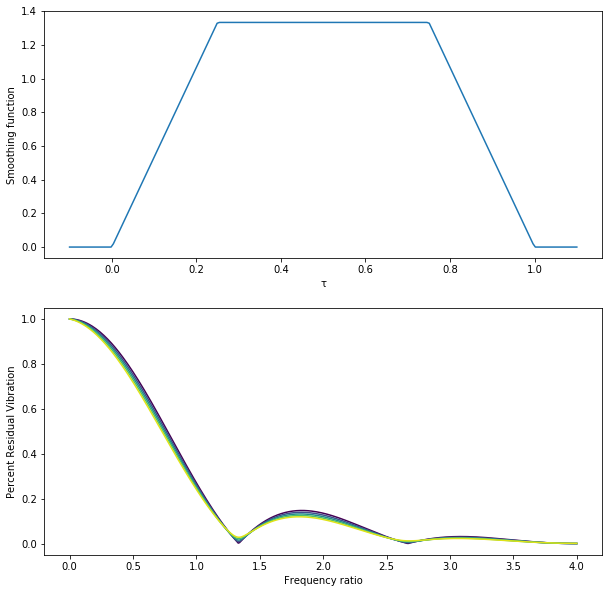

In [27]:
def u(tau):
    return 8/3*min(2*tau,2-2*tau,0.5)

plotfun(limitTo01(u))

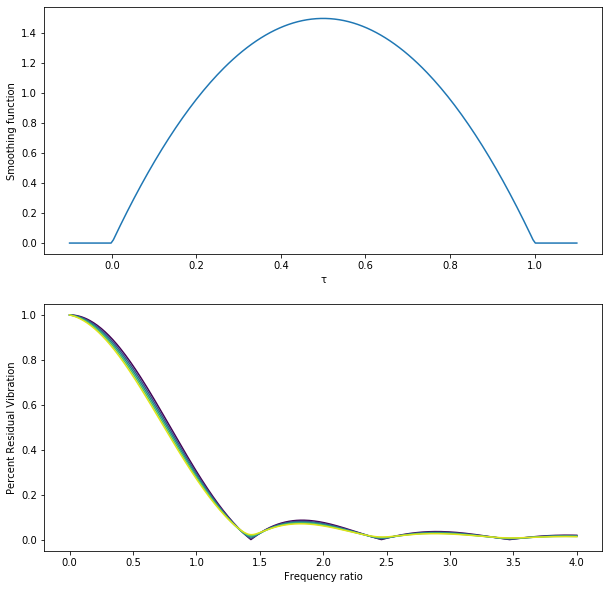

In [37]:
def u(tau):
    return 6* (0.25-(tau-0.5)**2)

plotfun(limitTo01(u))

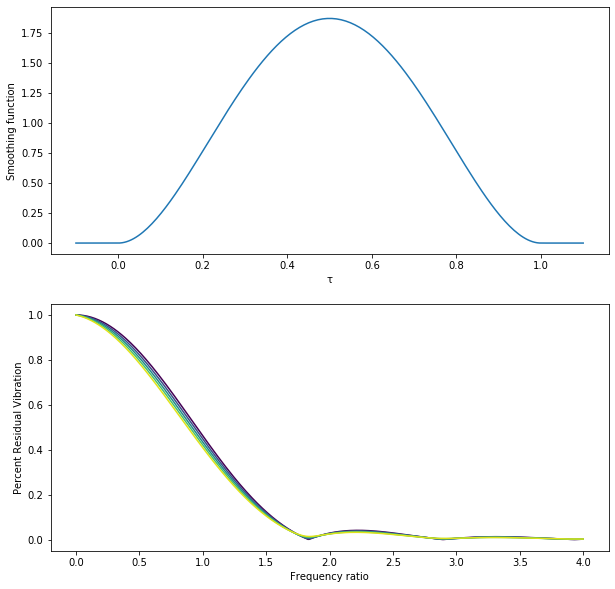

In [8]:
def u(tau):
    return 30* tau**2 * (tau-1)**2

plotfun(limitTo01(u))

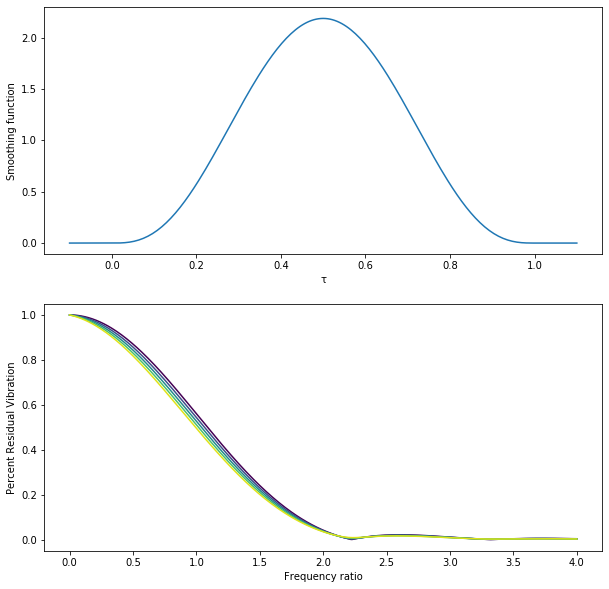

In [9]:
def u(tau):
    return -140* tau**3 * (tau-1)**3

plotfun(limitTo01(u))

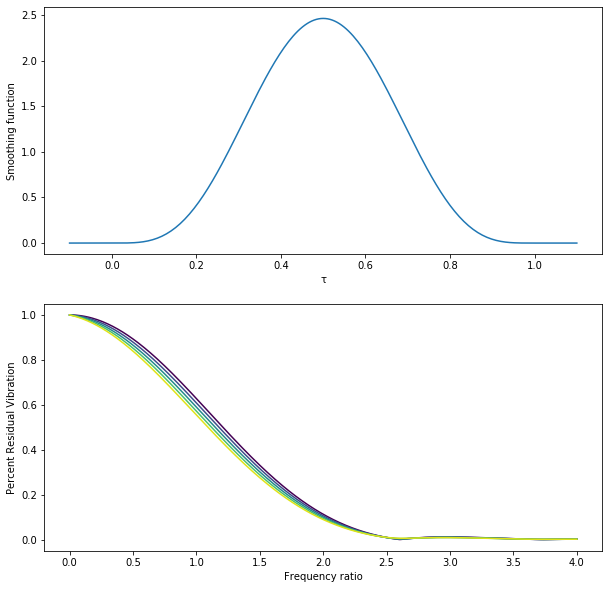

In [10]:
def u(tau):
    return 630* tau**4 * (tau-1)**4

plotfun(limitTo01(u))

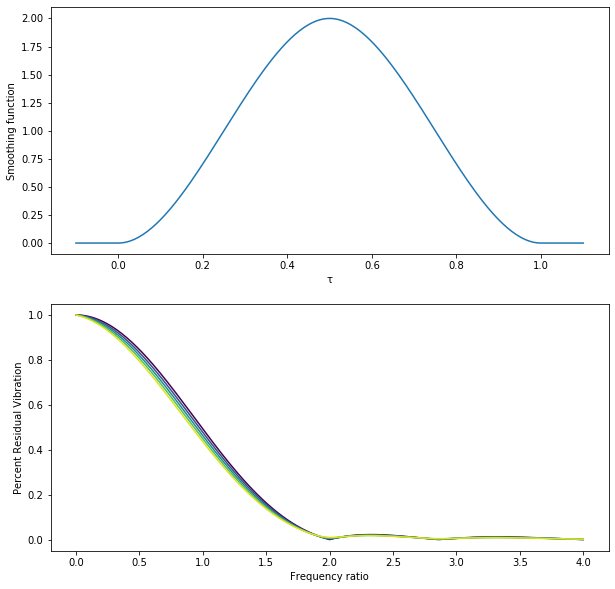

In [11]:
def u(tau):
    return 2*(1-np.abs(2*tau-1))**2*(2*np.abs(2*tau-1)+1)

plotfun(limitTo01(u))

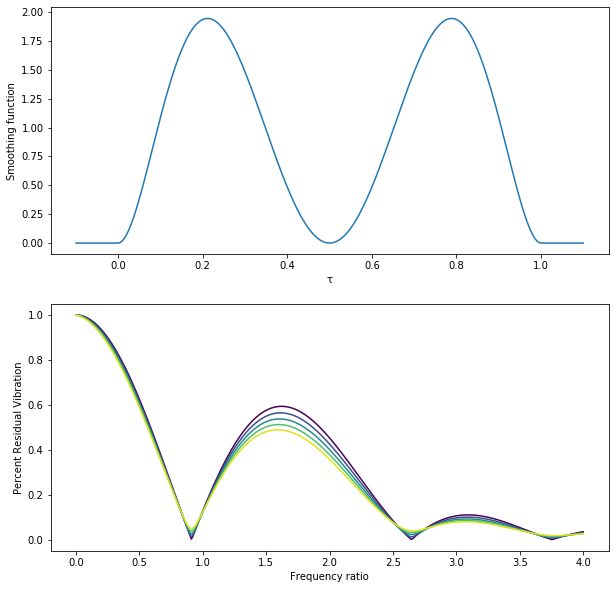

In [12]:
def u(tau):
    return 840* tau**2 * (tau-1)**2 * (tau-0.5)**2

plotfun(limitTo01(u))

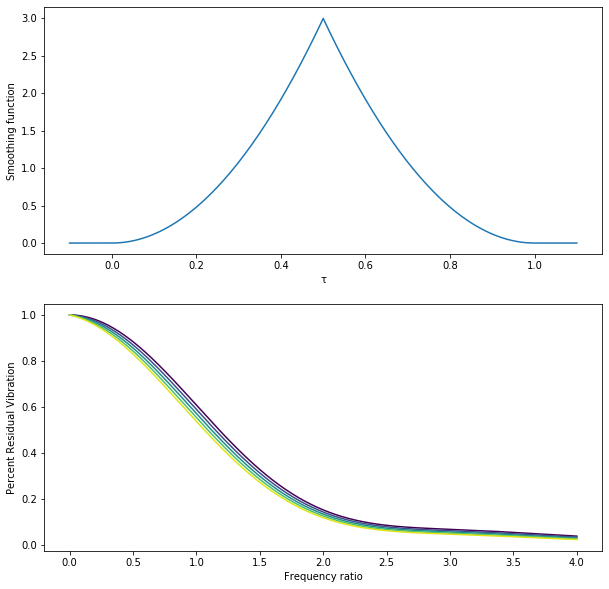

In [23]:
def u(tau):
    return 12*min((tau)**2, (tau-1)**2)

plotfun(limitTo01(u))

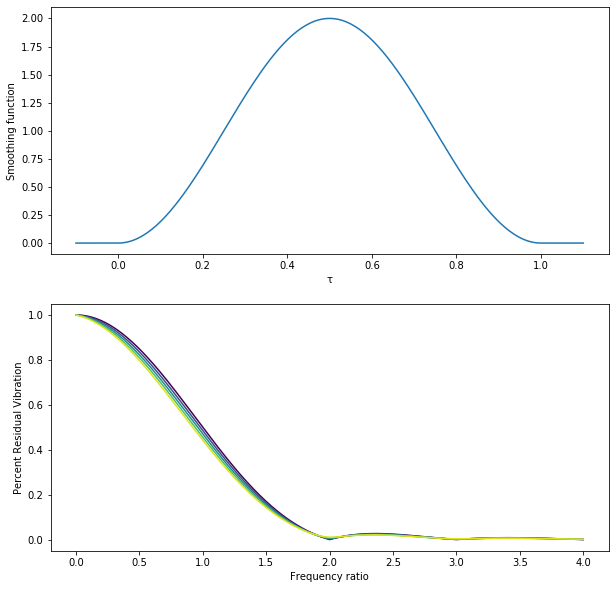

In [14]:
def u(tau):
    return 1-np.cos(tau*2*np.pi)

plotfun(limitTo01(u))

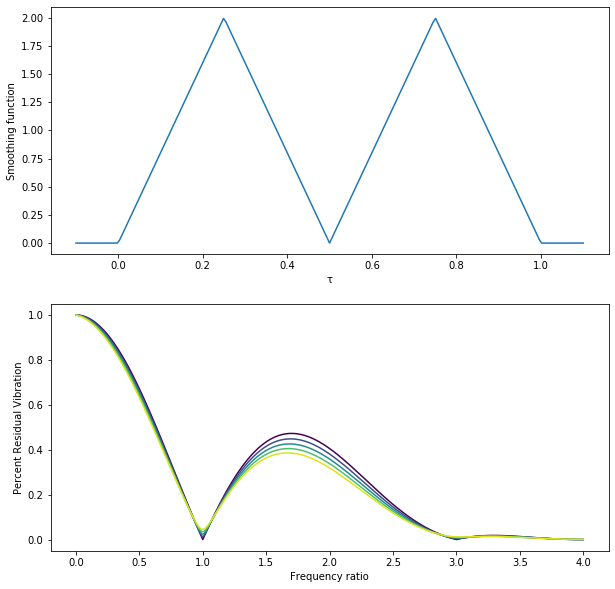

In [15]:
def u(tau):
    return 4*max(min(2*tau,1-2*tau),min(2*tau-1,2-2*tau))

plotfun(limitTo01(u))

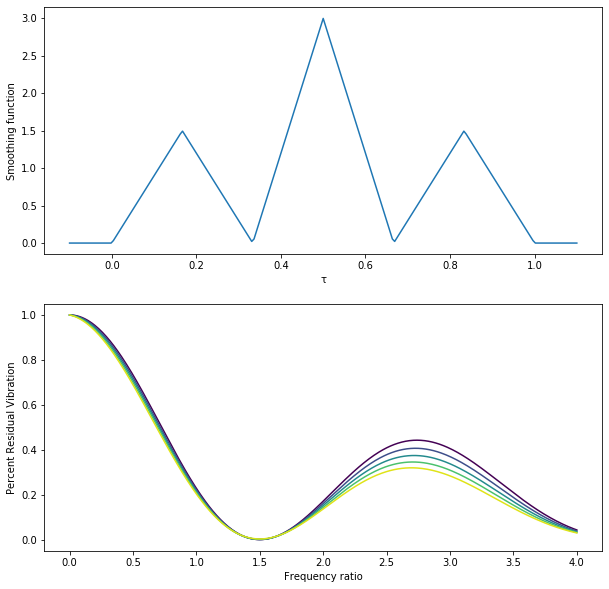

In [16]:
def u(tau):
    return 3*max(min(3*tau,1-3*tau),min(6*tau-2,4-6*tau),min(3*tau-2,3-3*tau))

plotfun(limitTo01(u))

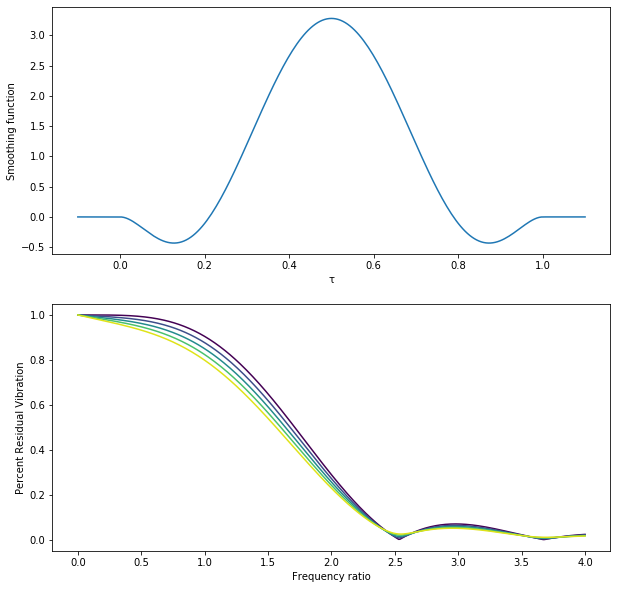

In [17]:
def u(tau):
    return 210*(-3*(tau-0.5)**6 + 7*0.5**2*(tau-0.5)**4 - 5*0.5**4*(tau-0.5)**2 + 0.5**6)

plotfun(limitTo01(u))


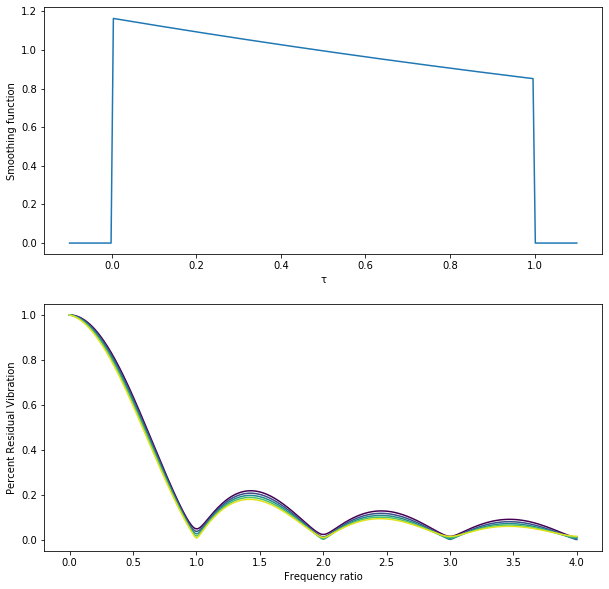

In [18]:
# account for damping ratio of 5%
def u(tau):
    return 1.1652908 * np.exp(-0.05*2*np.pi*tau)

plotfun(limitTo01(u))

In [19]:
def sd(tau,omega,xi):
    return np.exp(xi*omega*tau) * np.sin(omega*tau*np.sqrt(1-xi**2))
def cd(tau,omega,xi):
    return np.exp(xi*omega*tau) * np.cos(omega*tau*np.sqrt(1-xi**2))

def A_discrete(t,omega,xi,times,weights):
    S = sum([w*sd(tau,omega,xi) for tau,w in zip(times, weights)])
    C = sum([w*cd(tau,omega,xi) for tau,w in zip(times, weights)])
    PRV = np.exp(-xi*omega*t) * np.sqrt(S**2 + C**2)
    return PRV


In [20]:
def plotfun_discrete(times, weights):
    Fs = np.linspace(0.,4.,401)
    omegas = 2*np.pi*Fs
    xis = np.arange(0.0,0.05,0.01)
    As = np.array([[A_discrete(times[-1],omega,xi,times, weights) for xi in xis] for omega in omegas])
    #
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    ax[0].stem(times,weights,use_line_collection=True)
    ax[0].set_xlabel('τ')
    ax[0].set_ylabel('Shaping pulses')
    nXis = len(xis)
    colors = plt.cm.viridis(np.linspace(0,0.95,nXis))
    for xi_idx in range(0,nXis):
        ax[1].plot(Fs,As[:,xi_idx],color=colors[xi_idx])
    ax[1].set_xlabel('Frequency ratio')
    ax[1].set_ylabel('Percent Residual Vibration')

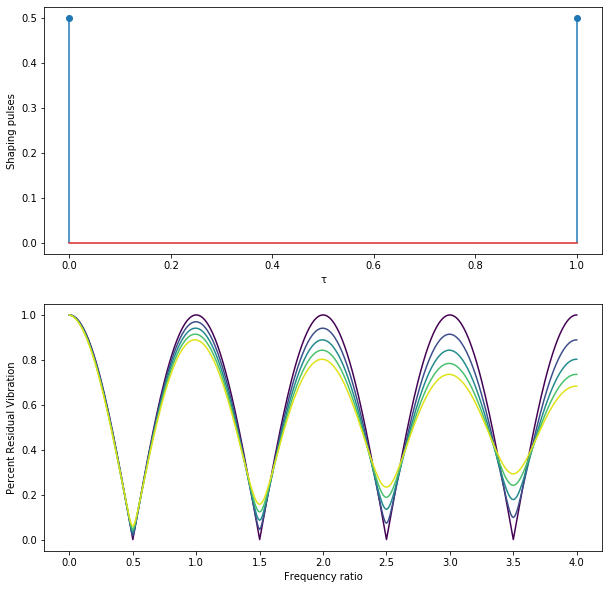

In [21]:
times = [0,1]
weights = [0.5, 0.5]
plotfun_discrete(times, weights)

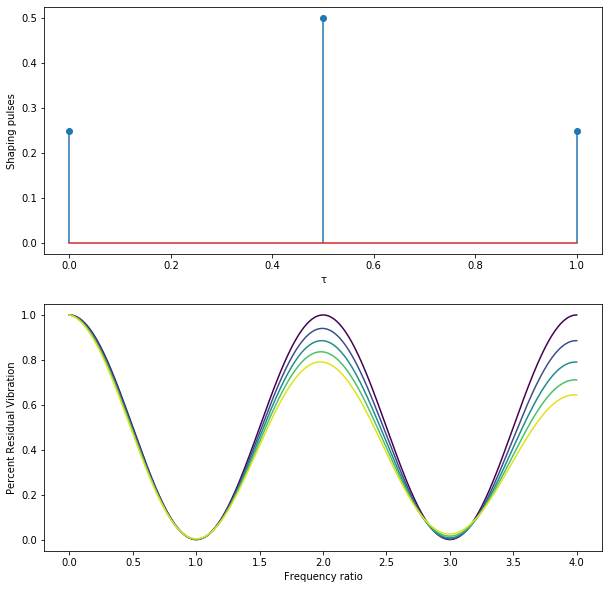

In [22]:
times = [0,0.5,1]
weights = [0.25, 0.5, 0.25]
plotfun_discrete(times, weights)